### Student Information
Name: 許瀞云

Student ID: 108061586

GitHub ID: kris265x

Kaggle name: kriskris

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

---

In [38]:
### Begin Assignment Here

## First Part :  Take Home Exercises

### Exercise 1 (Take home): 
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [39]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [40]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [41]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

In [42]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

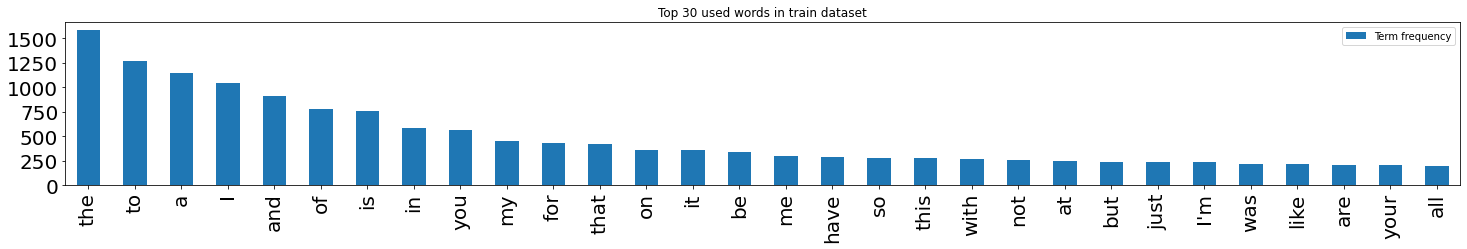

In [43]:
# Answer here

from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
# BOW_vectorizer = CountVectorizer()
# BOW_vectorizer.fit(train_df['text'])
# BOW = BOW_vectorizer.vocabulary_

# Train dataset
BOW = defaultdict(int)
for each in train_df['text']:
    for word in each.split():
        BOW[word]+=1

word = []
freq = []
for key in sorted(list(BOW.keys()),key = lambda i:BOW[i], reverse=True)[:30]:     
    word.append(key)
    freq.append(BOW[key])
    
# plot the most used 100 terms    
df = pd.DataFrame(freq, columns = ["Term frequency"], index = word)
ax = df.plot.bar(title = 'Top 30 used words in train dataset', fontsize = 20, figsize = (25,3))

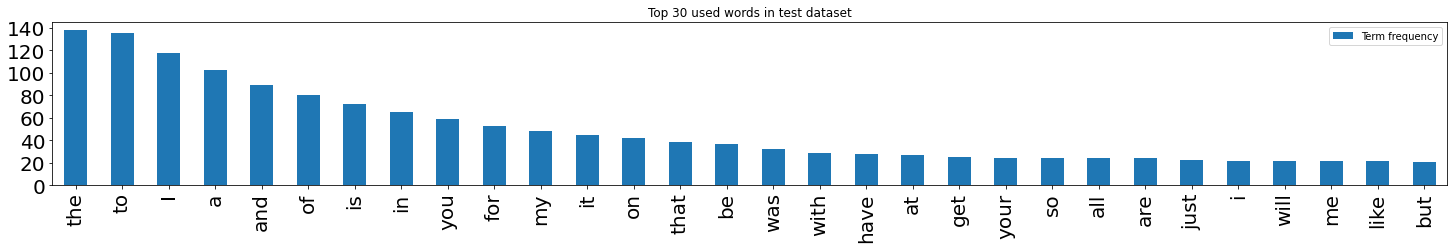

In [44]:
# Test dataset
BOW = defaultdict(int)
for each in test_df['text']:
    for word in each.split():
        BOW[word]+=1

word = []
freq = []
for key in sorted(list(BOW.keys()),key = lambda i:BOW[i], reverse=True)[:30]:     
    word.append(key)
    freq.append(BOW[key])
    
# plot the most used 100 terms    
df = pd.DataFrame(freq, columns = ["Term frequency"], index = word)
ax = df.plot.bar(title = 'Top 30 used words in test dataset', fontsize = 20, figsize = (25,3))

---
### Exercise 2 (Take home): 
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [45]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF_vectorizer = TfidfVectorizer(max_features=1000)
TFIDF_vectorizer.fit(train_df['text'])

train_data_TFIDF_features = TFIDF_vectorizer.transform(train_df['text'])
test_data_TFIDF_features = TFIDF_vectorizer.transform(test_df['text'])
# feature_names = TFIDF_vectorizer.get_feature_names()
# feature_names[100:110]

In [46]:
# observe some feature names
feature_names = TFIDF_vectorizer.get_feature_names()
feature_names[100:110]

['bitch',
 'bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body']

---
### Exercise 3 (Take home): 
Can you interpret the results above? What do they mean?

In [47]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/Users/kris/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3613, 500)

In [48]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [49]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

In [50]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[52 17  7  8]
 [17 77  6 10]
 [ 5 13 52  9]
 [ 9  9 12 44]]


In [51]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

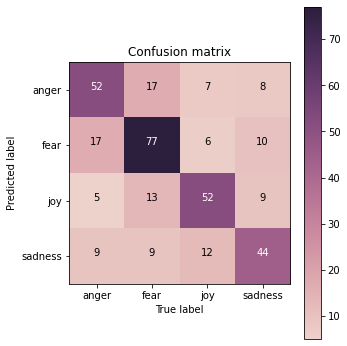

In [52]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

#### Answer here

The plot above is the result of visualizing the confusion matrix calculated earlier.
The horizontal axis is the True label which is the correct answer that the model should predict successfully.
The vertical axis on the other hand is the predicted label predicted by the model.

We can see from both the color and the numerical value of how our model perform. For example, the lattice with the darkest color with the numerical value 72 means that the model successfully predict the emotion fear for 72 times.
However, the lattice to the left with the numerical value 20 means that the correct answer should be anger, but the model wrongly predicts the emotion as fear rather than anger. Also note the higher numerical value, the darker the lattice color gets.


---
### Exercise 4 (Take home): 
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [53]:
# Answer here

from sklearn.naive_bayes import MultinomialNB
import nltk

BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

# Model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb.score(X_test, y_test)

/Users/kris/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7060518731988472

#### Answer here
Using the mnb.score to evaluate, we get the mean accuracy on our testing data. The prediction result is about 70% correct.

---
### Exercise 5 (Take home):  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

#### Answer here

From the evaluation above, we can see that the decision tree model produces a testing accuracy about 0.65. And the Naive Bayes model produces a testing accuracy around 0.7. The reason why the Naive Bayes model performs better is because the decision tree model overfits the training data. We can see from the evaluation result above that the training accuracy of the decision tree model is 0.99 but the testing accuracy however isn't ideal.

---
###  Exercise 6 (Take home): 

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

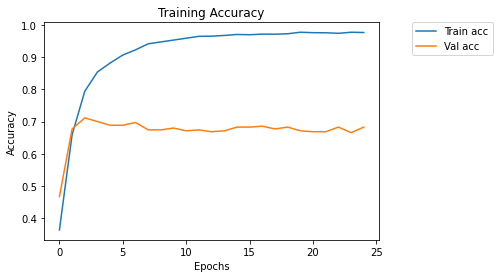

In [54]:
# Answer here
import matplotlib.pyplot as plt
training_log = pd.read_csv("logs/training_log.csv")

plt.plot(training_log.epoch, training_log.accuracy, label='Train acc')
plt.plot(training_log.epoch, training_log.val_accuracy, label='Val acc')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)

plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

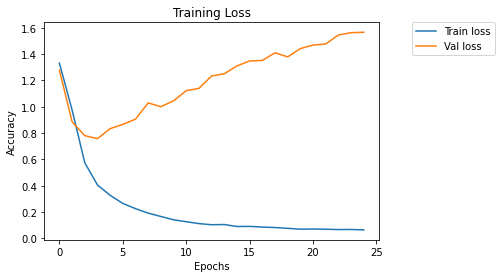

In [55]:
plt.plot(training_log.epoch, training_log.loss, label='Train loss')
plt.plot(training_log.epoch, training_log.val_loss, label='Val loss')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)

plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

#### Answer here

From the Training loss image above, we can observe that while the training loss decrese, the validation loss does not. The validation loss decreases within 5 epochs, however, it starts to increase after that. Therefore, the model is overfitting.

---
### Exercise 7 (Take home): 

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


#### Answer here

In order to compose a sentence using a sequence of words, we can simply build a LSTM model. It can not only process single data points, but also entire sequences of data. In our case, by utilizing a LSTM model, we can rebuilt the sentence from words.


---
###  Exercise 8 (Take home):  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [56]:
# Answer here

from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


In [57]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

load ok


In [58]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted

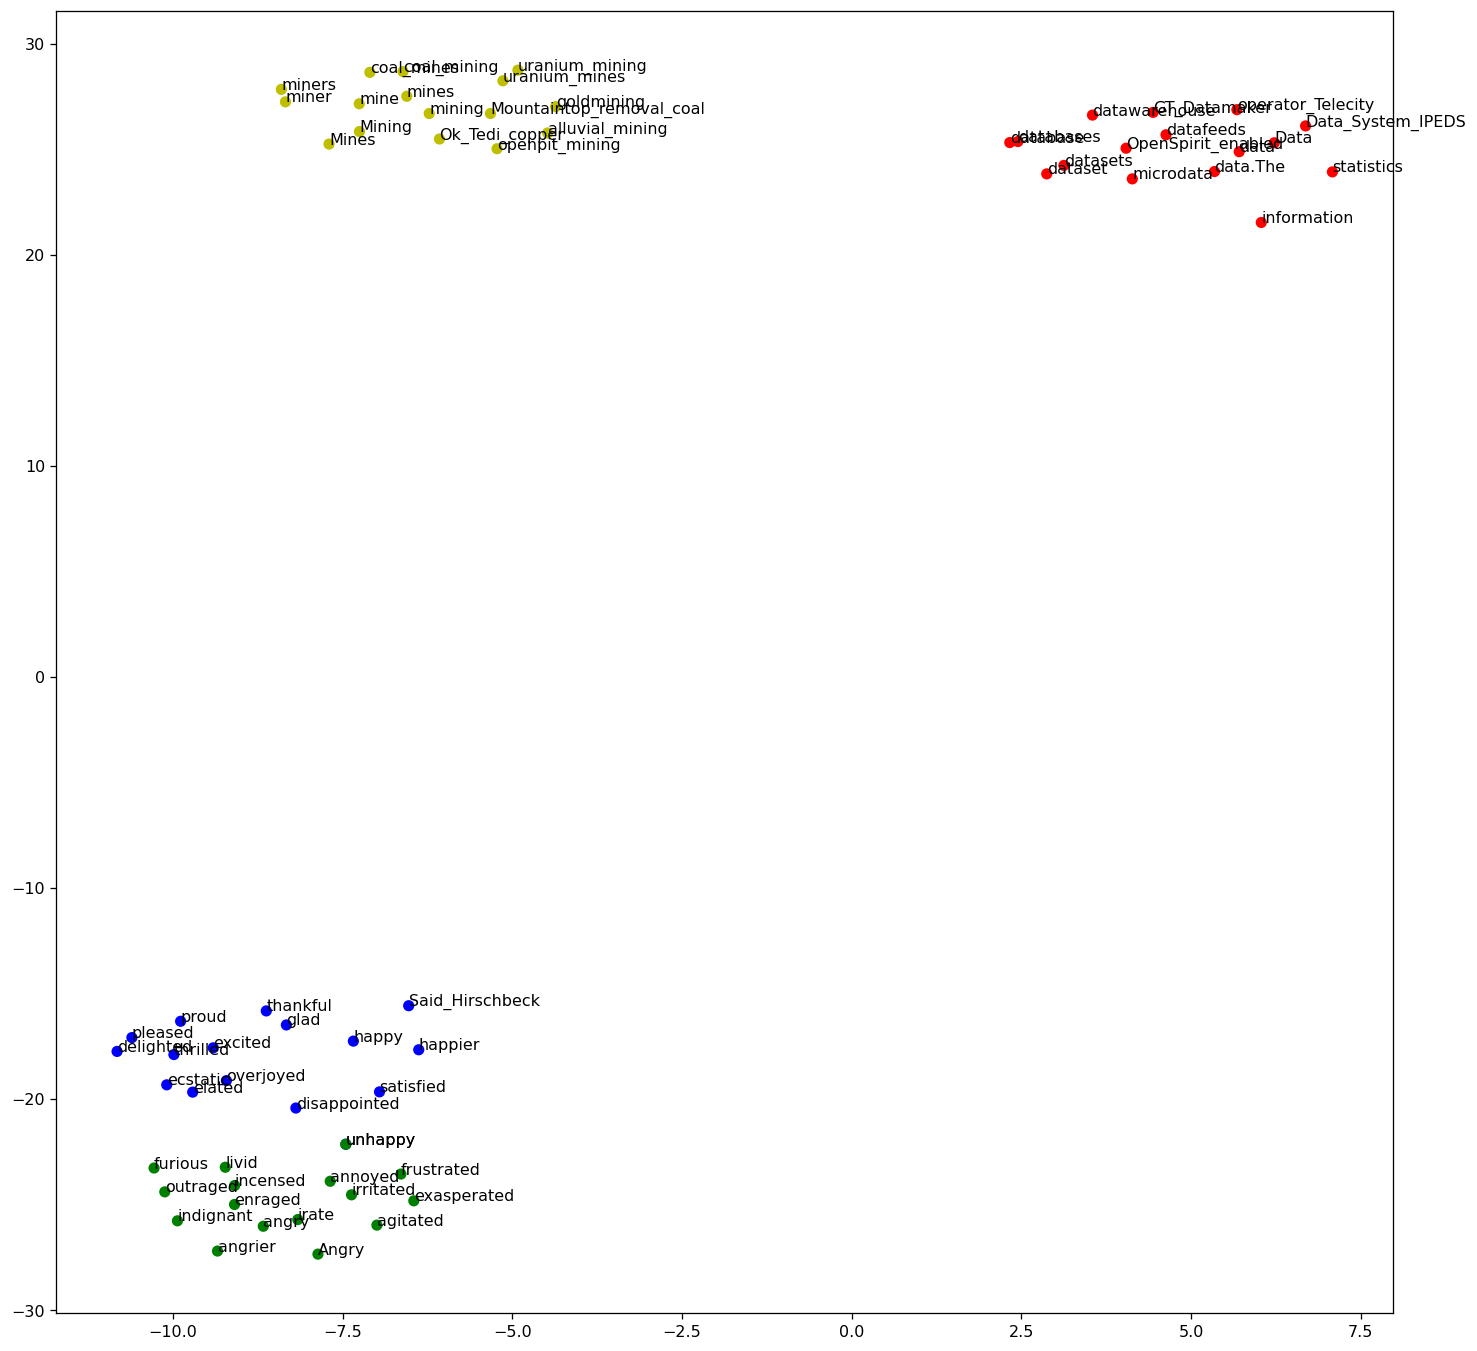

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(15, 15), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---

## Second Part :  Kaggle Competition

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

## Third Part :  Kaggle Competition Report

### Preprocessing Steps

The dataset we are dealing with contains 1455563 pieces of training data and 411972 pieces of testing data. A total of 1867535 pieces of data. 

After taking some close looks at the tweets, i decided to temporarity skip the preprocessing steps. The reason being that the contents in each tweet varys a lot. For example, so tweets contain emojis, others may contains slangs, and also all sorts of abbreviation and acronym (TTYL, LMAO, TBH...etc).

It's hard for me to process the various contents and this large amounts of data by just one general code, especially due to the time constraint of the competition.

So i decided to first skip the steps, and focus on training my model. And if i had enough time after finishing training the model, i would come back to the preprocessing steps.

(Sadly, i did not have enough time.)

### Feature Engineering Steps

The training set was divided into multiple batches(size=32). Each batch with a fixed length was determined by the longest tweet in that batch.

For example, 32 piceses of training data was randomly chosen to be in the same batch, and the batch length was then determenind by the longest text among these 32 pieces of data. Other 31 pieces of data was then padd with a 'blank_vec' to the same length as the longest one. In my code, i set the black vec as '-', so if a text wasn't long enough in the batch, '-' was added until it has the same length as others.

### Model

Considering that we are dealing with sequence data, i chose Bidirectional RNN and LSTM as my classifier and cell, and Adam as my model optimizer. 

Instead of running an RNN only in the forward mode starting from the first token, bidirectional RNNs add a hidden layer that passes information in a backward direction enable to process information more flexible which is the reason why i chose biRNN, and here are some of the hyperparameters in my model:

input_size = 100

hidden_size = 64

num_layers = 1

batch_size  = 32

num_epochs = 5

learning_rate = 0.001

After my first submit at the Kaggle competition, i got a score at around 0.45. I then reset the number of epochs to 10 and learning rate to 0.005, and got a better score at around 0.48.

### Review and Imporvement

Even though the Kaggle compepition was dued already, i still kept some thoughts about how to improve my model performance.

First, try not to skip the preprocessing steps if possible. Cleaning and tidying up the data would definitely help improve the overall performance. 

Second, when generating the batches, i should first sort all my data from the shortest to the longest, and then diveide them into different batches. This would prevent some extremely long data ending up with some shorter data in the same batch, and therefore padded the shorter data with a lot of 'blank_vec'.

Third, I am still new in training a deep learning model, but i think that instead of setting my learing rate to a fixed value, i should have try to decay my learning rate.

---